In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import re
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, classification_report
import nltk
# nltk.download('wordnet')
# nltk.download('punkt')
import string

data = pd.read_pickle('final cleaned data input without any embedding.pkl')

In [2]:
data

,label,tweet
0,0,"[upset, cant, update, facebook, texting, it, m..."
1,0,"[i, dive, many, time, ball, manage, save, 0, t..."
2,0,"[whole, body, feel, itchy, like, fire]"
3,0,"[no, it, not, behave, all, im, mad, here, i, c..."
4,0,"[not, whole, crew]"
...,...,...
1599994,1,"[just, wake, up, have, no, school, best, feeli..."
1599995,1,"[thewdbcom, very, cool, hear, old, walt, inter..."
1599996,1,"[be, ready, mojo, makeover, ask, detail]"
1599997,1,"[happy, th, birthday, boo, alll, time, tupac, ..."


In [3]:
data['tweet'] = data['tweet'].apply(lambda x: ' '.join(x) if isinstance(x, list) else x)

In [4]:
data

,label,tweet
0,0,upset cant update facebook texting it might cr...
1,0,i dive many time ball manage save 0 the rest g...
2,0,whole body feel itchy like fire
3,0,no it not behave all im mad here i cant see ov...
4,0,not whole crew
...,...,...
1599994,1,just wake up have no school best feeling ever
1599995,1,thewdbcom very cool hear old walt interview â
1599996,1,be ready mojo makeover ask detail
1599997,1,happy th birthday boo alll time tupac amaru sh...


In [5]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Step 1: Create and fit the vectorizer
vectoriser = TfidfVectorizer(ngram_range=(1, 2), max_features=500000)
vectoriser.fit(data['tweet'])

# Check how many features (words/ngrams) were extracted
print('No. of feature_words: ', len(vectoriser.get_feature_names_out()))

# Step 2: Transform the tweets into TF-IDF vectors
tfidf_matrix = vectoriser.transform(data['tweet'])

# Step 3: Store the vectors into the DataFrame as a new column
# Each row in 'embedded' will be a sparse matrix row (1D vector)
data['embedded'] = list(tfidf_matrix)

No. of feature_words:  500000


In [6]:
X = data['embedded']

# Logistic Regression

Accuracy: 0.8109

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.79      0.81     39999
           1       0.80      0.83      0.81     40001

    accuracy                           0.81     80000
   macro avg       0.81      0.81      0.81     80000
weighted avg       0.81      0.81      0.81     80000



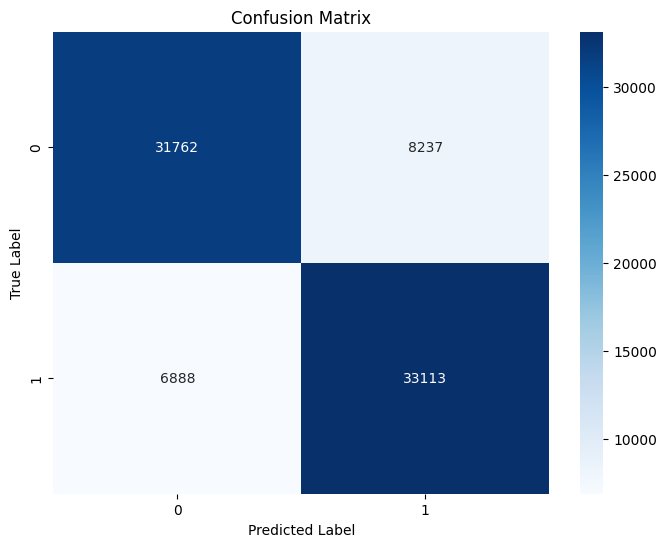

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Prepare your labels

# Use sparse matrix directly
from scipy.sparse import vstack

# Stack all sparse vectors vertically
X = vstack(data['embedded'].values)
y = data['label'].to_numpy()

# Split your data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05, random_state=42)

# Train the Logistic Regression model
model = LogisticRegression(solver='liblinear', penalty='l2', random_state=42)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred)) # No need for target_names if you're okay with numerical labels

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=sorted(data['label'].unique()), # Use unique numerical labels for x-axis
            yticklabels=sorted(data['label'].unique())) # Use unique numerical labels for y-axis
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [25]:
# Get the feature names from the TF-IDF vectorizer
feature_names = vectoriser.get_feature_names_out()

# Get class labels (e.g., [0, 1])
class_labels = model.classes_

# Get the coefficients for each class (one row per class, one column per feature)
coefs = model.coef_

In [29]:
import numpy as np
import pandas as pd

top_n = 20
feature_names = vectoriser.get_feature_names_out()
coefs = model.coef_[0]  # use the only row

# Top features that predict class 1 (positive)
top_indices = np.argsort(coefs)[-top_n:][::-1]
top_features = [(feature_names[i], coefs[i]) for i in top_indices]
df_top = pd.DataFrame(top_features, columns=["Feature", "Weight"])
print(f"\nTop {top_n} features for class 1:")
print(df_top)

# Optional: Bottom features (predict class 0)
bottom_indices = np.argsort(coefs)[:top_n]
bottom_features = [(feature_names[i], coefs[i]) for i in bottom_indices]
df_bottom = pd.DataFrame(bottom_features, columns=["Feature", "Weight"])
print(f"\nTop {top_n} features for class 0:")
print(df_bottom)



Top 20 features for class 1:
           Feature     Weight
0        cant wait  12.764554
1       no problem  10.064101
2         no worry   9.226514
3          not bad   9.164899
4      cannot wait   7.394549
5      dont forget   7.340192
6       dont worry   7.238697
7            happy   6.858184
8          not sad   6.758596
9            smile   6.744277
10       wish luck   6.574527
11       wasnt bad   6.534494
12        isnt bad   6.495296
13           thank   6.356038
14          thanks   6.118406
15         no need   6.035646
16         no prob   5.970251
17   nothing wrong   5.818065
18     doesnt hurt   5.795903
19  congratulation   5.780845

Top 20 features for class 0:
          Feature     Weight
0             sad -17.158870
1            miss -12.099572
2            poor -10.396107
3       not happy -10.056373
4            sick  -9.784003
5            cant  -9.754123
6           sadly  -9.293474
7            wish  -9.270458
8            hate  -8.683077
9            hurt  -

# Decision Tree

Accuracy: 0.7381

Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.74      0.74     79812
           1       0.74      0.74      0.74     80188

    accuracy                           0.74    160000
   macro avg       0.74      0.74      0.74    160000
weighted avg       0.74      0.74      0.74    160000



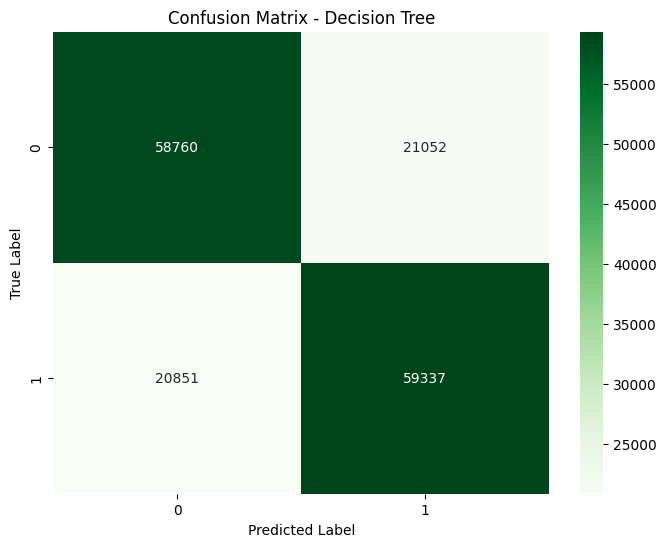

In [30]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# Train the Decision Tree model
model = DecisionTreeClassifier(random_state=42, max_depth=None)  # You can adjust max_depth for tuning
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens',
            xticklabels=sorted(data['label'].unique()),
            yticklabels=sorted(data['label'].unique()))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - Decision Tree')
plt.show()

# Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Split your data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# Train the Random Forest model
model = RandomForestClassifier(
    n_estimators=100,      # Number of trees in the forest
    max_depth=None,        # You can set this to limit tree depth
    random_state=42
)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Oranges',
            xticklabels=sorted(data['label'].unique()),
            yticklabels=sorted(data['label'].unique()))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - Random Forest')
plt.show()


# Multi Layer Perceptron

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Split your data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# Train the MLP model
model = MLPClassifier(
    hidden_layer_sizes=(100,),  # One hidden layer with 100 neurons
    activation='relu',          # Activation function for hidden layer ('relu' is common)
    solver='adam',              # Optimizer ('adam' is good for most cases)
    max_iter=300,               # Number of training epochs
    random_state=42
)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")



In [ ]:
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='coolwarm',
            xticklabels=sorted(data['label'].unique()),
            yticklabels=sorted(data['label'].unique()))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - MLP')
plt.show()